# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [793]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [794]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data = data_train.shape[0]
print(data_train.shape[1])
print(data_train)
print(data_train)
print(data_test)

label_train = np.zeros(num_data)
label_test = np.zeros(num_data)

for i in range(num_data):
    label_train[i] = data_train[i,2]
    label_test[i] = data_test[i,2]
    
print(label_train)
print(label_test)

    


3
[[1.24997125 0.55116792 0.        ]
 [1.40069243 0.57086375 0.        ]
 [1.50240279 0.58270987 0.        ]
 ...
 [0.14713069 1.17685185 1.        ]
 [0.69585812 0.96305034 1.        ]
 [0.65595031 0.88789132 1.        ]]
[[1.24997125 0.55116792 0.        ]
 [1.40069243 0.57086375 0.        ]
 [1.50240279 0.58270987 0.        ]
 ...
 [0.14713069 1.17685185 1.        ]
 [0.69585812 0.96305034 1.        ]
 [0.65595031 0.88789132 1.        ]]
[[1.73939304 0.44469976 0.        ]
 [1.5259443  0.26942179 0.        ]
 [1.50793705 0.11286165 0.        ]
 ...
 [0.51112672 1.05638393 1.        ]
 [0.27378771 1.18332068 1.        ]
 [0.26975867 0.67452711 1.        ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## plot the data

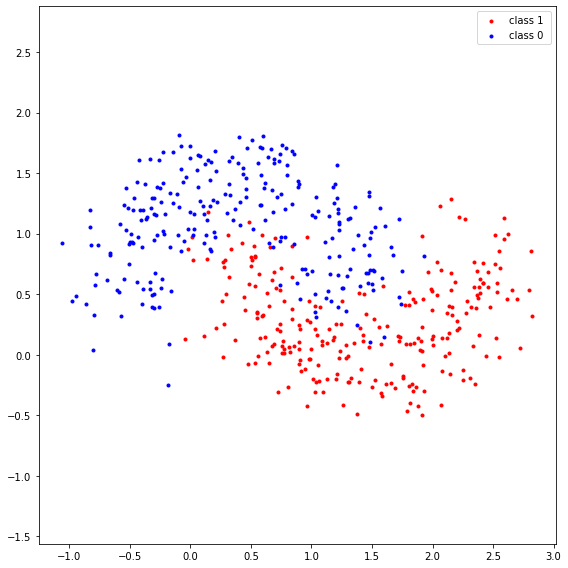

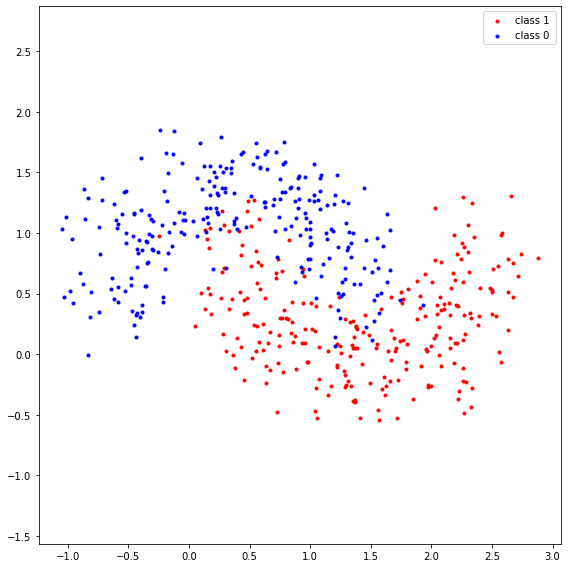

In [795]:
plt.figure(figsize=(8,8))
plt.scatter(data_train[:, 0][label_train == 1],data_train[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data_train[:, 0][label_train == 0],data_train[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(8,8))
plt.scatter(data_test[:, 0][label_test == 1],data_test[:, 1][label_test == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data_test[:, 0][label_test == 0],data_test[:, 1][label_test == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.show()

## define feature function

In [796]:
def feature_function(x, y):
    
    feature = np.array([np.ones(x.size),2*x,2*x**2,x**3,x**4,2*y,y**2,y**3,y**4,y**5])
    return feature

## define regression function based on the feature function

In [797]:
def regression_function(theta, feature):
    
    value = np.dot(theta,feature)
    
    return value

## define regularization function on the model parameters

In [798]:
def regularization_function(theta):
    
    d = len(theta)
    value = (1/d)*np.dot(theta,theta)
    
    return value

## define sigmoid function

In [799]:
def logistic_function(theta,feature):
    
    f = regression_function(theta,feature)
    z = 1/(1+np.exp(-f))
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [800]:
def compute_loss_feature(theta, feature, label, alpha):
    
    h = logistic_function(theta,feature)
    loss = 0
    e = np.finfo(float).eps
    loss = -((1/num_data)*(np.dot(label,np.log(h + e)) + np.dot((1-label),np.log(1-h + e))))
    loss = loss +  (alpha)*regularization_function(theta)
    
    return loss




## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [801]:
def compute_gradient_feature(theta, feature, label, alpha):
    X = feature
    h = logistic_function(theta,feature)
    l = label
    d = theta.size
    gradient = (1/num_data)*np.dot(X,(h-l)) + (2*alpha/d) * theta
    
    return gradient

## compute the accuracy

In [802]:
def compute_accuracy(theta, feature, label):
    
    h = np.array( logistic_function(theta,feature) )
    #print("h",h)
    computed_label = (h >= 0.5)
    #print("computed_label",computed_label)
    correct_matrix = (computed_label.astype(int) == label).astype(int)
    #print(correct_matrix)
    correct = np.sum(correct_matrix)
    #print("correct",correct)
    accuracy = correct/num_data
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [803]:
num_iteration   =  5550   
learning_rate   = 0.5
alpha           = 0.00000001

theta = np.array((0,0,0,0,0,0,0,0,0,0))

feature_train = feature_function(data_train[:, 0],data_train[:, 1])
feature_test = feature_function(data_test[:, 0],data_test[:, 1])
dim_feature = theta.size
train_loss = 0
test_loss = 0

In [804]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [805]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_train, label_train, alpha)
    
    train_loss = compute_loss_feature(theta, feature_train, label_train, alpha)
    test_loss = compute_loss_feature(theta, feature_test, label_test, alpha)
    
    theta_iteration[i] = theta
    loss_iteration_train[i] = train_loss
    loss_iteration_test[i] = test_loss
    
    accuracy_iteration_train[i] = compute_accuracy(theta, feature_train, label_train)
    accuracy_iteration_test[i] = compute_accuracy(theta, feature_test, label_test)
    
    
    print("[",i,"]loss(train) = ", loss_iteration_train[i],"loss(test) = ",loss_iteration_test[i],"ac_train",accuracy_iteration_train[i],"ac_test",accuracy_iteration_test[i])
    
theta_optimal = theta

[ 0 ]loss(train) =  1.1978189628186329 loss(test) =  1.1458702742065465 ac_train 0.782 ac_test 0.774
[ 1 ]loss(train) =  0.8001122978799983 loss(test) =  0.781010995387071 ac_train 0.784 ac_test 0.786
[ 2 ]loss(train) =  0.5482071832776518 loss(test) =  0.5570370727716882 ac_train 0.796 ac_test 0.792
[ 3 ]loss(train) =  0.42985575130939785 loss(test) =  0.44962919762100956 ac_train 0.764 ac_test 0.772
[ 4 ]loss(train) =  0.39419567580129294 loss(test) =  0.4172710188632527 ac_train 0.772 ac_test 0.77
[ 5 ]loss(train) =  0.3786195733909829 loss(test) =  0.40250495497880173 ac_train 0.784 ac_test 0.786
[ 6 ]loss(train) =  0.3655999626511918 loss(test) =  0.3897968729897021 ac_train 0.802 ac_test 0.798
[ 7 ]loss(train) =  0.3547898411973916 loss(test) =  0.37915935619896807 ac_train 0.828 ac_test 0.822
[ 8 ]loss(train) =  0.34594696388021745 loss(test) =  0.3703497096734204 ac_train 0.838 ac_test 0.832
[ 9 ]loss(train) =  0.33878334333499655 loss(test) =  0.3631582500981852 ac_train 0.842

[ 144 ]loss(train) =  0.2266175926303423 loss(test) =  0.2429452749589691 ac_train 0.894 ac_test 0.902
[ 145 ]loss(train) =  0.225351427017777 loss(test) =  0.24069489304139907 ac_train 0.908 ac_test 0.918
[ 146 ]loss(train) =  0.22572064782714218 loss(test) =  0.24197074354454765 ac_train 0.898 ac_test 0.902
[ 147 ]loss(train) =  0.22456474139921556 loss(test) =  0.2398608647079272 ac_train 0.906 ac_test 0.918
[ 148 ]loss(train) =  0.22484592632181205 loss(test) =  0.241018914800652 ac_train 0.9 ac_test 0.904
[ 149 ]loss(train) =  0.2237927205378333 loss(test) =  0.23904394974834134 ac_train 0.906 ac_test 0.918
[ 150 ]loss(train) =  0.22399348959560064 loss(test) =  0.2400898271570333 ac_train 0.902 ac_test 0.908
[ 151 ]loss(train) =  0.22303553850116245 loss(test) =  0.23824420515313904 ac_train 0.906 ac_test 0.918
[ 152 ]loss(train) =  0.2231634219029881 loss(test) =  0.23918354893158883 ac_train 0.902 ac_test 0.908
[ 153 ]loss(train) =  0.222293409505386 loss(test) =  0.23746172046

[ 259 ]loss(train) =  0.199269962108137 loss(test) =  0.21283417956310077 ac_train 0.922 ac_test 0.92
[ 260 ]loss(train) =  0.19912802247102515 loss(test) =  0.21267964740319031 ac_train 0.922 ac_test 0.92
[ 261 ]loss(train) =  0.19898687237974755 loss(test) =  0.2125259799533521 ac_train 0.922 ac_test 0.92
[ 262 ]loss(train) =  0.19884650529309614 loss(test) =  0.21237317051661936 ac_train 0.922 ac_test 0.92
[ 263 ]loss(train) =  0.1987069147423026 loss(test) =  0.21222121147552278 ac_train 0.922 ac_test 0.922
[ 264 ]loss(train) =  0.19856809433001296 loss(test) =  0.21207009603801424 ac_train 0.922 ac_test 0.922
[ 265 ]loss(train) =  0.19843003772931778 loss(test) =  0.211919816938325 ac_train 0.922 ac_test 0.922
[ 266 ]loss(train) =  0.19829273868277025 loss(test) =  0.2117703673978353 ac_train 0.922 ac_test 0.922
[ 267 ]loss(train) =  0.1981561910014412 loss(test) =  0.21162174041325174 ac_train 0.922 ac_test 0.922
[ 268 ]loss(train) =  0.19802038856397408 loss(test) =  0.211473929

[ 394 ]loss(train) =  0.18532945439969317 loss(test) =  0.19767309397851207 ac_train 0.924 ac_test 0.934
[ 395 ]loss(train) =  0.18525476795211732 loss(test) =  0.19759191036202453 ac_train 0.924 ac_test 0.934
[ 396 ]loss(train) =  0.18518038615335894 loss(test) =  0.19751105806137093 ac_train 0.924 ac_test 0.934
[ 397 ]loss(train) =  0.18510630717529405 loss(test) =  0.19743053508809838 ac_train 0.924 ac_test 0.934
[ 398 ]loss(train) =  0.18503252920447213 loss(test) =  0.1973503394698565 ac_train 0.924 ac_test 0.934
[ 399 ]loss(train) =  0.18495905044196867 loss(test) =  0.19727046925023228 ac_train 0.924 ac_test 0.932
[ 400 ]loss(train) =  0.18488586910323956 loss(test) =  0.19719092248858716 ac_train 0.924 ac_test 0.932
[ 401 ]loss(train) =  0.18481298341797714 loss(test) =  0.19711169725989633 ac_train 0.924 ac_test 0.932
[ 402 ]loss(train) =  0.1847403916299679 loss(test) =  0.1970327916545898 ac_train 0.924 ac_test 0.932
[ 403 ]loss(train) =  0.18466809199695194 loss(test) =  0.

[ 537 ]loss(train) =  0.1770615076082217 loss(test) =  0.18868815342425735 ac_train 0.928 ac_test 0.932
[ 538 ]loss(train) =  0.1770169865635378 loss(test) =  0.1886397982377261 ac_train 0.928 ac_test 0.932
[ 539 ]loss(train) =  0.176972608597021 loss(test) =  0.18859159899120767 ac_train 0.928 ac_test 0.932
[ 540 ]loss(train) =  0.1769283730434334 loss(test) =  0.18854355496298075 ac_train 0.928 ac_test 0.932
[ 541 ]loss(train) =  0.1768842792416628 loss(test) =  0.18849566543578894 ac_train 0.928 ac_test 0.932
[ 542 ]loss(train) =  0.1768403265346903 loss(test) =  0.18844792969680568 ac_train 0.928 ac_test 0.932
[ 543 ]loss(train) =  0.176796514269559 loss(test) =  0.18840034703760006 ac_train 0.928 ac_test 0.932
[ 544 ]loss(train) =  0.1767528417973415 loss(test) =  0.18835291675410226 ac_train 0.928 ac_test 0.932
[ 545 ]loss(train) =  0.1767093084731097 loss(test) =  0.18830563814656967 ac_train 0.928 ac_test 0.932
[ 546 ]loss(train) =  0.1766659136559032 loss(test) =  0.1882585105

[ 644 ]loss(train) =  0.17299545665305172 loss(test) =  0.18427507979302912 ac_train 0.93 ac_test 0.934
[ 645 ]loss(train) =  0.17296315241012553 loss(test) =  0.18424005295682114 ac_train 0.93 ac_test 0.934
[ 646 ]loss(train) =  0.17293093834827086 loss(test) =  0.18420512461506547 ac_train 0.93 ac_test 0.934
[ 647 ]loss(train) =  0.1728988141077375 loss(test) =  0.18417029437650145 ac_train 0.93 ac_test 0.934
[ 648 ]loss(train) =  0.1728667793306801 loss(test) =  0.18413556185192945 ac_train 0.93 ac_test 0.934
[ 649 ]loss(train) =  0.1728348336611454 loss(test) =  0.18410092665419733 ac_train 0.93 ac_test 0.934
[ 650 ]loss(train) =  0.1728029767450595 loss(test) =  0.18406638839818695 ac_train 0.93 ac_test 0.934
[ 651 ]loss(train) =  0.1727712082302161 loss(test) =  0.18403194670080048 ac_train 0.93 ac_test 0.934
[ 652 ]loss(train) =  0.1727395277662633 loss(test) =  0.18399760118094743 ac_train 0.93 ac_test 0.934
[ 653 ]loss(train) =  0.17270793500469175 loss(test) =  0.183963351459

[ 794 ]loss(train) =  0.16899157668363277 loss(test) =  0.17994101274551197 ac_train 0.932 ac_test 0.934
[ 795 ]loss(train) =  0.1689696217487976 loss(test) =  0.17991729988010627 ac_train 0.932 ac_test 0.934
[ 796 ]loss(train) =  0.16894771894471788 loss(test) =  0.17989364405509978 ac_train 0.932 ac_test 0.934
[ 797 ]loss(train) =  0.16892586809713697 loss(test) =  0.1798700450802622 ac_train 0.932 ac_test 0.934
[ 798 ]loss(train) =  0.1689040690325645 loss(test) =  0.1798465027661959 ac_train 0.932 ac_test 0.934
[ 799 ]loss(train) =  0.16888232157827243 loss(test) =  0.1798230169243313 ac_train 0.932 ac_test 0.934
[ 800 ]loss(train) =  0.16886062556229037 loss(test) =  0.17979958736692261 ac_train 0.932 ac_test 0.934
[ 801 ]loss(train) =  0.16883898081340212 loss(test) =  0.17977621390704296 ac_train 0.932 ac_test 0.934
[ 802 ]loss(train) =  0.16881738716114084 loss(test) =  0.17975289635858002 ac_train 0.932 ac_test 0.934
[ 803 ]loss(train) =  0.16879584443578524 loss(test) =  0.17

[ 932 ]loss(train) =  0.1663895693627066 loss(test) =  0.17713681990638963 ac_train 0.932 ac_test 0.932
[ 933 ]loss(train) =  0.16637343781569494 loss(test) =  0.17711948116898524 ac_train 0.932 ac_test 0.932
[ 934 ]loss(train) =  0.1663573401215328 loss(test) =  0.17710217949652646 ac_train 0.932 ac_test 0.932
[ 935 ]loss(train) =  0.16634127618127503 loss(test) =  0.17708491478075886 ac_train 0.932 ac_test 0.932
[ 936 ]loss(train) =  0.16632524589635392 loss(test) =  0.17706768691383948 ac_train 0.932 ac_test 0.932
[ 937 ]loss(train) =  0.16630924916857695 loss(test) =  0.17705049578833507 ac_train 0.932 ac_test 0.932
[ 938 ]loss(train) =  0.16629328590012557 loss(test) =  0.17703334129721998 ac_train 0.932 ac_test 0.932
[ 939 ]loss(train) =  0.166277355993553 loss(test) =  0.17701622333387435 ac_train 0.932 ac_test 0.932
[ 940 ]loss(train) =  0.16626145935178255 loss(test) =  0.17699914179208207 ac_train 0.932 ac_test 0.932
[ 941 ]loss(train) =  0.16624559587810608 loss(test) =  0.1

[ 1064 ]loss(train) =  0.16451988894781466 loss(test) =  0.1751324459730377 ac_train 0.934 ac_test 0.928
[ 1065 ]loss(train) =  0.16450749292347006 loss(test) =  0.17511919748349192 ac_train 0.934 ac_test 0.928
[ 1066 ]loss(train) =  0.16449512038600642 loss(test) =  0.17510597471161915 ac_train 0.934 ac_test 0.928
[ 1067 ]loss(train) =  0.16448277127390706 loss(test) =  0.1750927775900482 ac_train 0.934 ac_test 0.928
[ 1068 ]loss(train) =  0.1644704455258637 loss(test) =  0.17507960605163608 ac_train 0.934 ac_test 0.928
[ 1069 ]loss(train) =  0.1644581430807757 loss(test) =  0.1750664600294668 ac_train 0.934 ac_test 0.928
[ 1070 ]loss(train) =  0.16444586387774915 loss(test) =  0.17505333945685045 ac_train 0.934 ac_test 0.928
[ 1071 ]loss(train) =  0.1644336078560961 loss(test) =  0.17504024426732262 ac_train 0.934 ac_test 0.928
[ 1072 ]loss(train) =  0.1644213749553336 loss(test) =  0.17502717439464305 ac_train 0.934 ac_test 0.928
[ 1073 ]loss(train) =  0.16440916511518303 loss(test)

[ 1172 ]loss(train) =  0.16330529381933365 loss(test) =  0.17383757564942764 ac_train 0.934 ac_test 0.928
[ 1173 ]loss(train) =  0.16329511724356782 loss(test) =  0.1738267573176218 ac_train 0.934 ac_test 0.928
[ 1174 ]loss(train) =  0.16328495855743563 loss(test) =  0.17381595857272059 ac_train 0.934 ac_test 0.928
[ 1175 ]loss(train) =  0.16327481771764574 loss(test) =  0.1738051793673022 ac_train 0.934 ac_test 0.928
[ 1176 ]loss(train) =  0.16326469468104146 loss(test) =  0.1737944196540925 ac_train 0.934 ac_test 0.928
[ 1177 ]loss(train) =  0.1632545894046006 loss(test) =  0.17378367938596434 ac_train 0.934 ac_test 0.928
[ 1178 ]loss(train) =  0.1632445018454345 loss(test) =  0.17377295851593688 ac_train 0.934 ac_test 0.928
[ 1179 ]loss(train) =  0.16323443196078763 loss(test) =  0.17376225699717537 ac_train 0.934 ac_test 0.928
[ 1180 ]loss(train) =  0.16322437970803716 loss(test) =  0.1737515747829904 ac_train 0.934 ac_test 0.928
[ 1181 ]loss(train) =  0.16321434504469262 loss(test

[ 1343 ]loss(train) =  0.16179378223832452 loss(test) =  0.17223800380555332 ac_train 0.934 ac_test 0.93
[ 1344 ]loss(train) =  0.16178613039669756 loss(test) =  0.17222994947395479 ac_train 0.934 ac_test 0.93
[ 1345 ]loss(train) =  0.16177849064457248 loss(test) =  0.17222190837618756 ac_train 0.934 ac_test 0.93
[ 1346 ]loss(train) =  0.16177086295574133 loss(test) =  0.17221388048355044 ac_train 0.934 ac_test 0.93
[ 1347 ]loss(train) =  0.16176324730406846 loss(test) =  0.1722058657674213 ac_train 0.934 ac_test 0.93
[ 1348 ]loss(train) =  0.16175564366349038 loss(test) =  0.1721978641992572 ac_train 0.934 ac_test 0.93
[ 1349 ]loss(train) =  0.1617480520080156 loss(test) =  0.1721898757505939 ac_train 0.934 ac_test 0.93
[ 1350 ]loss(train) =  0.1617404723117242 loss(test) =  0.172181900393046 ac_train 0.934 ac_test 0.93
[ 1351 ]loss(train) =  0.16173290454876768 loss(test) =  0.17217393809830603 ac_train 0.934 ac_test 0.93
[ 1352 ]loss(train) =  0.16172534869336866 loss(test) =  0.172

[ 1493 ]loss(train) =  0.1607679916309379 loss(test) =  0.17116338128636505 ac_train 0.934 ac_test 0.93
[ 1494 ]loss(train) =  0.16076189578771888 loss(test) =  0.17115703014847808 ac_train 0.934 ac_test 0.93
[ 1495 ]loss(train) =  0.16075580879370543 loss(test) =  0.17115068869656538 ac_train 0.934 ac_test 0.93
[ 1496 ]loss(train) =  0.16074973063126313 loss(test) =  0.17114435691132343 ac_train 0.934 ac_test 0.93
[ 1497 ]loss(train) =  0.16074366128280207 loss(test) =  0.17113803477349762 ac_train 0.934 ac_test 0.93
[ 1498 ]loss(train) =  0.1607376007307766 loss(test) =  0.17113172226388157 ac_train 0.934 ac_test 0.93
[ 1499 ]loss(train) =  0.16073154895768524 loss(test) =  0.17112541936331768 ac_train 0.934 ac_test 0.93
[ 1500 ]loss(train) =  0.16072550594607055 loss(test) =  0.1711191260526962 ac_train 0.934 ac_test 0.93
[ 1501 ]loss(train) =  0.160719471678519 loss(test) =  0.17111284231295582 ac_train 0.934 ac_test 0.93
[ 1502 ]loss(train) =  0.16071344613766078 loss(test) =  0.1

[ 1643 ]loss(train) =  0.1599436088804556 loss(test) =  0.17030921421666348 ac_train 0.934 ac_test 0.93
[ 1644 ]loss(train) =  0.1599386653398146 loss(test) =  0.17030412435172862 ac_train 0.934 ac_test 0.93
[ 1645 ]loss(train) =  0.15993372843316167 loss(test) =  0.1702990417483709 ac_train 0.934 ac_test 0.93
[ 1646 ]loss(train) =  0.15992879814823316 loss(test) =  0.1702939663931712 ac_train 0.934 ac_test 0.93
[ 1647 ]loss(train) =  0.15992387447279355 loss(test) =  0.17028889827274166 ac_train 0.934 ac_test 0.93
[ 1648 ]loss(train) =  0.15991895739463585 loss(test) =  0.17028383737372557 ac_train 0.934 ac_test 0.93
[ 1649 ]loss(train) =  0.15991404690158145 loss(test) =  0.17027878368279692 ac_train 0.934 ac_test 0.93
[ 1650 ]loss(train) =  0.15990914298147982 loss(test) =  0.17027373718666092 ac_train 0.934 ac_test 0.93
[ 1651 ]loss(train) =  0.1599042456222087 loss(test) =  0.17026869787205356 ac_train 0.934 ac_test 0.93
[ 1652 ]loss(train) =  0.15989935481167375 loss(test) =  0.1

[ 1793 ]loss(train) =  0.1592699841363752 loss(test) =  0.16962006792019266 ac_train 0.936 ac_test 0.93
[ 1794 ]loss(train) =  0.15926591285066996 loss(test) =  0.16961593288955795 ac_train 0.936 ac_test 0.93
[ 1795 ]loss(train) =  0.15926184663792567 loss(test) =  0.16961180341265644 ac_train 0.936 ac_test 0.93
[ 1796 ]loss(train) =  0.15925778548937738 loss(test) =  0.16960767947989974 ac_train 0.936 ac_test 0.93
[ 1797 ]loss(train) =  0.1592537293962786 loss(test) =  0.16960356108171992 ac_train 0.936 ac_test 0.93
[ 1798 ]loss(train) =  0.15924967834990192 loss(test) =  0.16959944820856998 ac_train 0.936 ac_test 0.93
[ 1799 ]loss(train) =  0.1592456323415386 loss(test) =  0.1695953408509232 ac_train 0.936 ac_test 0.93
[ 1800 ]loss(train) =  0.15924159136249888 loss(test) =  0.16959123899927353 ac_train 0.936 ac_test 0.93
[ 1801 ]loss(train) =  0.15923755540411139 loss(test) =  0.1695871426441353 ac_train 0.936 ac_test 0.93
[ 1802 ]loss(train) =  0.15923352445772346 loss(test) =  0.1

[ 1933 ]loss(train) =  0.15874571121352615 loss(test) =  0.16909120562110783 ac_train 0.934 ac_test 0.93
[ 1934 ]loss(train) =  0.15874227261228424 loss(test) =  0.16908776330339778 ac_train 0.934 ac_test 0.93
[ 1935 ]loss(train) =  0.15873883802066133 loss(test) =  0.16908432537624413 ac_train 0.934 ac_test 0.93
[ 1936 ]loss(train) =  0.15873540743211623 loss(test) =  0.16908089183249148 ac_train 0.934 ac_test 0.93
[ 1937 ]loss(train) =  0.15873198084012086 loss(test) =  0.16907746266499896 ac_train 0.934 ac_test 0.93
[ 1938 ]loss(train) =  0.15872855823816048 loss(test) =  0.16907403786664016 ac_train 0.934 ac_test 0.93
[ 1939 ]loss(train) =  0.15872513961973336 loss(test) =  0.169070617430303 ac_train 0.934 ac_test 0.93
[ 1940 ]loss(train) =  0.1587217249783512 loss(test) =  0.16906720134888975 ac_train 0.934 ac_test 0.93
[ 1941 ]loss(train) =  0.15871831430753838 loss(test) =  0.16906378961531715 ac_train 0.934 ac_test 0.93
[ 1942 ]loss(train) =  0.1587149076008328 loss(test) =  0.

[ 2052 ]loss(train) =  0.15836297756497492 loss(test) =  0.168710545416977 ac_train 0.936 ac_test 0.93
[ 2053 ]loss(train) =  0.1583599735648095 loss(test) =  0.16870757903631026 ac_train 0.936 ac_test 0.93
[ 2054 ]loss(train) =  0.15835697288058462 loss(test) =  0.16870461628735714 ac_train 0.936 ac_test 0.93
[ 2055 ]loss(train) =  0.15835397550712962 loss(test) =  0.16870165716446098 ac_train 0.936 ac_test 0.93
[ 2056 ]loss(train) =  0.1583509814392836 loss(test) =  0.16869870166197565 ac_train 0.936 ac_test 0.93
[ 2057 ]loss(train) =  0.15834799067189584 loss(test) =  0.168695749774266 ac_train 0.936 ac_test 0.93
[ 2058 ]loss(train) =  0.15834500319982536 loss(test) =  0.16869280149570767 ac_train 0.936 ac_test 0.93
[ 2059 ]loss(train) =  0.15834201901794115 loss(test) =  0.16868985682068716 ac_train 0.936 ac_test 0.93
[ 2060 ]loss(train) =  0.158339038121122 loss(test) =  0.16868691574360156 ac_train 0.936 ac_test 0.93
[ 2061 ]loss(train) =  0.1583360605042566 loss(test) =  0.16868

[ 2193 ]loss(train) =  0.15796992488680325 loss(test) =  0.16832570515391637 ac_train 0.934 ac_test 0.93
[ 2194 ]loss(train) =  0.15796734161189957 loss(test) =  0.16832319961533082 ac_train 0.934 ac_test 0.93
[ 2195 ]loss(train) =  0.15796476101244933 loss(test) =  0.16832069700764782 ac_train 0.934 ac_test 0.93
[ 2196 ]loss(train) =  0.157962183084483 loss(test) =  0.1683181973265233 ac_train 0.934 ac_test 0.93
[ 2197 ]loss(train) =  0.15795960782403837 loss(test) =  0.16831570056762082 ac_train 0.934 ac_test 0.93
[ 2198 ]loss(train) =  0.15795703522716023 loss(test) =  0.168313206726612 ac_train 0.934 ac_test 0.93
[ 2199 ]loss(train) =  0.15795446528990092 loss(test) =  0.16831071579917628 ac_train 0.934 ac_test 0.93
[ 2200 ]loss(train) =  0.15795189800831966 loss(test) =  0.16830822778100107 ac_train 0.934 ac_test 0.93
[ 2201 ]loss(train) =  0.15794933337848296 loss(test) =  0.1683057426677813 ac_train 0.934 ac_test 0.93
[ 2202 ]loss(train) =  0.15794677139646449 loss(test) =  0.16

[ 2333 ]loss(train) =  0.15763262654085108 loss(test) =  0.1680016173848631 ac_train 0.934 ac_test 0.93
[ 2334 ]loss(train) =  0.15763038221692838 loss(test) =  0.16799948319277092 ac_train 0.934 ac_test 0.93
[ 2335 ]loss(train) =  0.15762814007659864 loss(test) =  0.1679973513931686 ac_train 0.934 ac_test 0.93
[ 2336 ]loss(train) =  0.15762590011676736 loss(test) =  0.16799522198266795 ac_train 0.934 ac_test 0.93
[ 2337 ]loss(train) =  0.1576236623343455 loss(test) =  0.16799309495788653 ac_train 0.934 ac_test 0.93
[ 2338 ]loss(train) =  0.1576214267262494 loss(test) =  0.1679909703154478 ac_train 0.934 ac_test 0.93
[ 2339 ]loss(train) =  0.15761919328940047 loss(test) =  0.167988848051981 ac_train 0.934 ac_test 0.93
[ 2340 ]loss(train) =  0.1576169620207258 loss(test) =  0.1679867281641212 ac_train 0.934 ac_test 0.93
[ 2341 ]loss(train) =  0.1576147329171575 loss(test) =  0.16798461064850925 ac_train 0.934 ac_test 0.93
[ 2342 ]loss(train) =  0.15761250597563328 loss(test) =  0.167982

[ 2472 ]loss(train) =  0.15734032862670483 loss(test) =  0.16772650961181623 ac_train 0.934 ac_test 0.93
[ 2473 ]loss(train) =  0.15733836033634788 loss(test) =  0.16772467787427991 ac_train 0.934 ac_test 0.93
[ 2474 ]loss(train) =  0.1573363938463816 loss(test) =  0.16772284810951998 ac_train 0.934 ac_test 0.93
[ 2475 ]loss(train) =  0.15733442915436105 loss(test) =  0.16772102031485742 ac_train 0.934 ac_test 0.93
[ 2476 ]loss(train) =  0.15733246625784497 loss(test) =  0.16771919448761768 ac_train 0.934 ac_test 0.93
[ 2477 ]loss(train) =  0.15733050515439662 loss(test) =  0.1677173706251306 ac_train 0.934 ac_test 0.93
[ 2478 ]loss(train) =  0.1573285458415827 loss(test) =  0.16771554872473027 ac_train 0.934 ac_test 0.93
[ 2479 ]loss(train) =  0.15732658831697452 loss(test) =  0.1677137287837554 ac_train 0.934 ac_test 0.93
[ 2480 ]loss(train) =  0.157324632578147 loss(test) =  0.1677119107995491 ac_train 0.934 ac_test 0.93
[ 2481 ]loss(train) =  0.1573226786226793 loss(test) =  0.1677

[ 2604 ]loss(train) =  0.15709521090805803 loss(test) =  0.16750082396821622 ac_train 0.934 ac_test 0.93
[ 2605 ]loss(train) =  0.15709346055304454 loss(test) =  0.16749923102999636 ac_train 0.934 ac_test 0.93
[ 2606 ]loss(train) =  0.15709171170784997 loss(test) =  0.16749763974607587 ac_train 0.934 ac_test 0.93
[ 2607 ]loss(train) =  0.15708996437050057 loss(test) =  0.16749605011429042 ac_train 0.934 ac_test 0.93
[ 2608 ]loss(train) =  0.15708821853902533 loss(test) =  0.16749446213247896 ac_train 0.934 ac_test 0.93
[ 2609 ]loss(train) =  0.1570864742114566 loss(test) =  0.16749287579848407 ac_train 0.934 ac_test 0.93
[ 2610 ]loss(train) =  0.15708473138582965 loss(test) =  0.16749129111015146 ac_train 0.934 ac_test 0.93
[ 2611 ]loss(train) =  0.15708299006018314 loss(test) =  0.16748970806533042 ac_train 0.934 ac_test 0.93
[ 2612 ]loss(train) =  0.15708125023255864 loss(test) =  0.16748812666187368 ac_train 0.934 ac_test 0.93
[ 2613 ]loss(train) =  0.15707951190100078 loss(test) = 

[ 2717 ]loss(train) =  0.156906532114251 loss(test) =  0.16733080475403506 ac_train 0.934 ac_test 0.93
[ 2718 ]loss(train) =  0.156904940574436 loss(test) =  0.16732938581687418 ac_train 0.934 ac_test 0.93
[ 2719 ]loss(train) =  0.1569033503398949 loss(test) =  0.16732796830966465 ac_train 0.934 ac_test 0.93
[ 2720 ]loss(train) =  0.15690176140897305 loss(test) =  0.16732655223059098 ac_train 0.934 ac_test 0.93
[ 2721 ]loss(train) =  0.1569001737800184 loss(test) =  0.16732513757784057 ac_train 0.934 ac_test 0.93
[ 2722 ]loss(train) =  0.1568985874513813 loss(test) =  0.16732372434960335 ac_train 0.934 ac_test 0.93
[ 2723 ]loss(train) =  0.1568970024214149 loss(test) =  0.1673223125440723 ac_train 0.934 ac_test 0.93
[ 2724 ]loss(train) =  0.15689541868847445 loss(test) =  0.16732090215944292 ac_train 0.934 ac_test 0.93
[ 2725 ]loss(train) =  0.15689383625091824 loss(test) =  0.16731949319391365 ac_train 0.934 ac_test 0.93
[ 2726 ]loss(train) =  0.1568922551071067 loss(test) =  0.167318

[ 2887 ]loss(train) =  0.15665346996161328 loss(test) =  0.16710875412200638 ac_train 0.932 ac_test 0.93
[ 2888 ]loss(train) =  0.15665207844712203 loss(test) =  0.16710755427107815 ac_train 0.932 ac_test 0.93
[ 2889 ]loss(train) =  0.15665068798967666 loss(test) =  0.16710635557760226 ac_train 0.932 ac_test 0.93
[ 2890 ]loss(train) =  0.1566492985879948 loss(test) =  0.16710515804017023 ac_train 0.932 ac_test 0.93
[ 2891 ]loss(train) =  0.15664791024079622 loss(test) =  0.1671039616573758 ac_train 0.932 ac_test 0.93
[ 2892 ]loss(train) =  0.15664652294680237 loss(test) =  0.16710276642781444 ac_train 0.932 ac_test 0.93
[ 2893 ]loss(train) =  0.15664513670473657 loss(test) =  0.167101572350084 ac_train 0.932 ac_test 0.93
[ 2894 ]loss(train) =  0.15664375151332416 loss(test) =  0.16710037942278408 ac_train 0.932 ac_test 0.93
[ 2895 ]loss(train) =  0.15664236737129206 loss(test) =  0.16709918764451656 ac_train 0.932 ac_test 0.93
[ 2896 ]loss(train) =  0.1566409842773694 loss(test) =  0.1

[ 2993 ]loss(train) =  0.1565116135187591 loss(test) =  0.16698774927553298 ac_train 0.932 ac_test 0.93
[ 2994 ]loss(train) =  0.15651032726197628 loss(test) =  0.16698666465554604 ac_train 0.932 ac_test 0.93
[ 2995 ]loss(train) =  0.1565090419361695 loss(test) =  0.16698558105448671 ac_train 0.932 ac_test 0.93
[ 2996 ]loss(train) =  0.1565077575402387 loss(test) =  0.16698449847114577 ac_train 0.932 ac_test 0.93
[ 2997 ]loss(train) =  0.15650647407308527 loss(test) =  0.16698341690431573 ac_train 0.932 ac_test 0.93
[ 2998 ]loss(train) =  0.1565051915336121 loss(test) =  0.16698233635279044 ac_train 0.932 ac_test 0.93
[ 2999 ]loss(train) =  0.1565039099207236 loss(test) =  0.16698125681536588 ac_train 0.932 ac_test 0.93
[ 3000 ]loss(train) =  0.15650262923332606 loss(test) =  0.16698017829083947 ac_train 0.932 ac_test 0.93
[ 3001 ]loss(train) =  0.15650134947032698 loss(test) =  0.16697910077801048 ac_train 0.932 ac_test 0.93
[ 3002 ]loss(train) =  0.1565000706306355 loss(test) =  0.16

[ 3124 ]loss(train) =  0.15635065591290798 loss(test) =  0.16685391669333038 ac_train 0.932 ac_test 0.93
[ 3125 ]loss(train) =  0.15634948279002087 loss(test) =  0.16685295585080998 ac_train 0.932 ac_test 0.93
[ 3126 ]loss(train) =  0.1563483104664161 loss(test) =  0.1668519958823978 ac_train 0.932 ac_test 0.93
[ 3127 ]loss(train) =  0.15634713894117805 loss(test) =  0.1668510367870861 ac_train 0.932 ac_test 0.93
[ 3128 ]loss(train) =  0.15634596821339233 loss(test) =  0.16685007856386908 ac_train 0.932 ac_test 0.93
[ 3129 ]loss(train) =  0.1563447982821459 loss(test) =  0.16684912121174206 ac_train 0.932 ac_test 0.93
[ 3130 ]loss(train) =  0.1563436291465268 loss(test) =  0.1668481647297019 ac_train 0.932 ac_test 0.93
[ 3131 ]loss(train) =  0.15634246080562447 loss(test) =  0.16684720911674653 ac_train 0.932 ac_test 0.93
[ 3132 ]loss(train) =  0.15634129325852958 loss(test) =  0.1668462543718757 ac_train 0.932 ac_test 0.93
[ 3133 ]loss(train) =  0.156340126504334 loss(test) =  0.16684

[ 3243 ]loss(train) =  0.1562164249897786 loss(test) =  0.16674544828475885 ac_train 0.932 ac_test 0.93
[ 3244 ]loss(train) =  0.15621534088271258 loss(test) =  0.16674458474962395 ac_train 0.932 ac_test 0.93
[ 3245 ]loss(train) =  0.15621425747429585 loss(test) =  0.16674372197783993 ac_train 0.932 ac_test 0.93
[ 3246 ]loss(train) =  0.1562131747637495 loss(test) =  0.16674285996854898 ac_train 0.932 ac_test 0.93
[ 3247 ]loss(train) =  0.1562120927502957 loss(test) =  0.16674199872089487 ac_train 0.932 ac_test 0.93
[ 3248 ]loss(train) =  0.15621101143315777 loss(test) =  0.16674113823402226 ac_train 0.932 ac_test 0.93
[ 3249 ]loss(train) =  0.15620993081155987 loss(test) =  0.16674027850707693 ac_train 0.932 ac_test 0.93
[ 3250 ]loss(train) =  0.15620885088472738 loss(test) =  0.16673941953920599 ac_train 0.932 ac_test 0.93
[ 3251 ]loss(train) =  0.15620777165188665 loss(test) =  0.16673856132955756 ac_train 0.932 ac_test 0.93
[ 3252 ]loss(train) =  0.15620669311226504 loss(test) =  0

[ 3393 ]loss(train) =  0.15606120716637525 loss(test) =  0.1666239978335558 ac_train 0.932 ac_test 0.93
[ 3394 ]loss(train) =  0.15606021969676676 loss(test) =  0.16662323981363236 ac_train 0.932 ac_test 0.93
[ 3395 ]loss(train) =  0.15605923281979406 loss(test) =  0.166622482440277 ac_train 0.932 ac_test 0.93
[ 3396 ]loss(train) =  0.15605824653481798 loss(test) =  0.16662172571278555 ac_train 0.932 ac_test 0.93
[ 3397 ]loss(train) =  0.1560572608412003 loss(test) =  0.1666209696304543 ac_train 0.932 ac_test 0.93
[ 3398 ]loss(train) =  0.1560562757383035 loss(test) =  0.1666202141925809 ac_train 0.932 ac_test 0.93
[ 3399 ]loss(train) =  0.156055291225491 loss(test) =  0.16661945939846357 ac_train 0.932 ac_test 0.93
[ 3400 ]loss(train) =  0.1560543073021269 loss(test) =  0.16661870524740152 ac_train 0.932 ac_test 0.93
[ 3401 ]loss(train) =  0.1560533239675763 loss(test) =  0.16661795173869487 ac_train 0.932 ac_test 0.93
[ 3402 ]loss(train) =  0.15605234122120498 loss(test) =  0.1666171

[ 3522 ]loss(train) =  0.15593850179660804 loss(test) =  0.1665313147749302 ac_train 0.932 ac_test 0.93
[ 3523 ]loss(train) =  0.1559375857766285 loss(test) =  0.16653063464974602 ac_train 0.932 ac_test 0.93
[ 3524 ]loss(train) =  0.15593667027325936 loss(test) =  0.1665299550873067 ac_train 0.932 ac_test 0.93
[ 3525 ]loss(train) =  0.15593575528595874 loss(test) =  0.16652927608701434 ac_train 0.932 ac_test 0.93
[ 3526 ]loss(train) =  0.15593484081418532 loss(test) =  0.1665285976482721 ac_train 0.932 ac_test 0.93
[ 3527 ]loss(train) =  0.15593392685739854 loss(test) =  0.1665279197704835 ac_train 0.932 ac_test 0.93
[ 3528 ]loss(train) =  0.15593301341505858 loss(test) =  0.1665272424530532 ac_train 0.932 ac_test 0.93
[ 3529 ]loss(train) =  0.1559321004866261 loss(test) =  0.16652656569538643 ac_train 0.932 ac_test 0.93
[ 3530 ]loss(train) =  0.15593118807156273 loss(test) =  0.166525889496889 ac_train 0.932 ac_test 0.93
[ 3531 ]loss(train) =  0.15593027616933056 loss(test) =  0.16652

[ 3655 ]loss(train) =  0.15582100641706284 loss(test) =  0.16644557777255822 ac_train 0.932 ac_test 0.93
[ 3656 ]loss(train) =  0.1558201545990228 loss(test) =  0.16644496751956708 ac_train 0.932 ac_test 0.93
[ 3657 ]loss(train) =  0.1558193032311476 loss(test) =  0.16644435775600167 ac_train 0.932 ac_test 0.93
[ 3658 ]loss(train) =  0.15581845231297806 loss(test) =  0.16644374848135512 ac_train 0.932 ac_test 0.93
[ 3659 ]loss(train) =  0.15581760184405527 loss(test) =  0.16644313969512092 ac_train 0.932 ac_test 0.93
[ 3660 ]loss(train) =  0.15581675182392127 loss(test) =  0.16644253139679355 ac_train 0.932 ac_test 0.93
[ 3661 ]loss(train) =  0.15581590225211836 loss(test) =  0.16644192358586757 ac_train 0.932 ac_test 0.93
[ 3662 ]loss(train) =  0.15581505312818958 loss(test) =  0.1664413162618387 ac_train 0.932 ac_test 0.93
[ 3663 ]loss(train) =  0.15581420445167837 loss(test) =  0.16644070942420294 ac_train 0.932 ac_test 0.93
[ 3664 ]loss(train) =  0.15581335622212886 loss(test) =  0

[ 3791 ]loss(train) =  0.15570911075858115 loss(test) =  0.1663668765459794 ac_train 0.932 ac_test 0.93
[ 3792 ]loss(train) =  0.1557083161673609 loss(test) =  0.1663663284431668 ac_train 0.932 ac_test 0.93
[ 3793 ]loss(train) =  0.15570752196870458 loss(test) =  0.16636578076617245 ac_train 0.932 ac_test 0.93
[ 3794 ]loss(train) =  0.15570672816222267 loss(test) =  0.16636523351456622 ac_train 0.932 ac_test 0.93
[ 3795 ]loss(train) =  0.15570593474752614 loss(test) =  0.1663646866879183 ac_train 0.932 ac_test 0.93
[ 3796 ]loss(train) =  0.1557051417242264 loss(test) =  0.16636414028579935 ac_train 0.932 ac_test 0.93
[ 3797 ]loss(train) =  0.15570434909193542 loss(test) =  0.16636359430778078 ac_train 0.932 ac_test 0.93
[ 3798 ]loss(train) =  0.15570355685026543 loss(test) =  0.16636304875343425 ac_train 0.932 ac_test 0.93
[ 3799 ]loss(train) =  0.15570276499882935 loss(test) =  0.16636250362233201 ac_train 0.932 ac_test 0.93
[ 3800 ]loss(train) =  0.15570197353724038 loss(test) =  0.1

[ 3908 ]loss(train) =  0.15561870954914156 loss(test) =  0.16630552987274433 ac_train 0.932 ac_test 0.93
[ 3909 ]loss(train) =  0.155617958361205 loss(test) =  0.16630502879894743 ac_train 0.932 ac_test 0.93
[ 3910 ]loss(train) =  0.15561720752325894 loss(test) =  0.16630452810392532 ac_train 0.932 ac_test 0.93
[ 3911 ]loss(train) =  0.15561645703496427 loss(test) =  0.1663040277873032 ac_train 0.932 ac_test 0.93
[ 3912 ]loss(train) =  0.1556157068959822 loss(test) =  0.16630352784870653 ac_train 0.932 ac_test 0.93
[ 3913 ]loss(train) =  0.15561495710597434 loss(test) =  0.16630302828776153 ac_train 0.932 ac_test 0.93
[ 3914 ]loss(train) =  0.15561420766460268 loss(test) =  0.16630252910409443 ac_train 0.932 ac_test 0.93
[ 3915 ]loss(train) =  0.1556134585715297 loss(test) =  0.16630203029733215 ac_train 0.932 ac_test 0.93
[ 3916 ]loss(train) =  0.15561270982641828 loss(test) =  0.166301531867102 ac_train 0.932 ac_test 0.93
[ 3917 ]loss(train) =  0.1556119614289315 loss(test) =  0.1663

[ 4074 ]loss(train) =  0.15549856314893046 loss(test) =  0.1662272710540501 ac_train 0.932 ac_test 0.93
[ 4075 ]loss(train) =  0.15549786569601912 loss(test) =  0.16622682803282476 ac_train 0.932 ac_test 0.93
[ 4076 ]loss(train) =  0.1554971685418527 loss(test) =  0.16622638533371198 ac_train 0.932 ac_test 0.93
[ 4077 ]loss(train) =  0.1554964716861511 loss(test) =  0.16622594295640225 ac_train 0.932 ac_test 0.93
[ 4078 ]loss(train) =  0.1554957751286347 loss(test) =  0.1662255009005859 ac_train 0.932 ac_test 0.93
[ 4079 ]loss(train) =  0.1554950788690239 loss(test) =  0.16622505916595395 ac_train 0.932 ac_test 0.93
[ 4080 ]loss(train) =  0.1554943829070396 loss(test) =  0.16622461775219777 ac_train 0.932 ac_test 0.93
[ 4081 ]loss(train) =  0.15549368724240303 loss(test) =  0.16622417665900882 ac_train 0.932 ac_test 0.93
[ 4082 ]loss(train) =  0.1554929918748357 loss(test) =  0.16622373588607908 ac_train 0.932 ac_test 0.93
[ 4083 ]loss(train) =  0.15549229680405946 loss(test) =  0.1662

[ 4192 ]loss(train) =  0.1554182535554366 loss(test) =  0.16617713801971457 ac_train 0.932 ac_test 0.93
[ 4193 ]loss(train) =  0.1554175895028884 loss(test) =  0.1661767309595419 ac_train 0.932 ac_test 0.93
[ 4194 ]loss(train) =  0.1554169257181256 loss(test) =  0.1661763241872309 ac_train 0.932 ac_test 0.93
[ 4195 ]loss(train) =  0.15541626220090304 loss(test) =  0.16617591770251025 ac_train 0.932 ac_test 0.93
[ 4196 ]loss(train) =  0.15541559895097565 loss(test) =  0.16617551150510892 ac_train 0.932 ac_test 0.93
[ 4197 ]loss(train) =  0.1554149359680988 loss(test) =  0.16617510559475612 ac_train 0.932 ac_test 0.93
[ 4198 ]loss(train) =  0.15541427325202795 loss(test) =  0.1661746999711812 ac_train 0.932 ac_test 0.93
[ 4199 ]loss(train) =  0.15541361080251906 loss(test) =  0.16617429463411415 ac_train 0.932 ac_test 0.93
[ 4200 ]loss(train) =  0.15541294861932817 loss(test) =  0.16617388958328502 ac_train 0.932 ac_test 0.93
[ 4201 ]loss(train) =  0.15541228670221174 loss(test) =  0.166

[ 4342 ]loss(train) =  0.15532150829936026 loss(test) =  0.16611915211860392 ac_train 0.934 ac_test 0.93
[ 4343 ]loss(train) =  0.1553208818176561 loss(test) =  0.16611878536359823 ac_train 0.934 ac_test 0.93
[ 4344 ]loss(train) =  0.15532025556981788 loss(test) =  0.16611841885891257 ac_train 0.934 ac_test 0.93
[ 4345 ]loss(train) =  0.15531962955563744 loss(test) =  0.16611805260431675 ac_train 0.934 ac_test 0.93
[ 4346 ]loss(train) =  0.1553190037749073 loss(test) =  0.1661176865995808 ac_train 0.934 ac_test 0.93
[ 4347 ]loss(train) =  0.15531837822741976 loss(test) =  0.16611732084447492 ac_train 0.934 ac_test 0.93
[ 4348 ]loss(train) =  0.15531775291296776 loss(test) =  0.16611695533876994 ac_train 0.934 ac_test 0.93
[ 4349 ]loss(train) =  0.1553171278313442 loss(test) =  0.16611659008223645 ac_train 0.934 ac_test 0.93
[ 4350 ]loss(train) =  0.15531650298234223 loss(test) =  0.1661162250746455 ac_train 0.934 ac_test 0.93
[ 4351 ]loss(train) =  0.15531587836575525 loss(test) =  0.1

[ 4490 ]loss(train) =  0.1552312271041385 loss(test) =  0.16606747812085162 ac_train 0.934 ac_test 0.93
[ 4491 ]loss(train) =  0.15523063308705842 loss(test) =  0.16606714603560882 ac_train 0.934 ac_test 0.93
[ 4492 ]loss(train) =  0.15523003927538553 loss(test) =  0.1660668141691768 ac_train 0.934 ac_test 0.93
[ 4493 ]loss(train) =  0.15522944566894242 loss(test) =  0.1660664825213591 ac_train 0.934 ac_test 0.93
[ 4494 ]loss(train) =  0.15522885226755184 loss(test) =  0.1660661510919596 ac_train 0.934 ac_test 0.93
[ 4495 ]loss(train) =  0.15522825907103696 loss(test) =  0.16606581988078228 ac_train 0.934 ac_test 0.93
[ 4496 ]loss(train) =  0.15522766607922078 loss(test) =  0.1660654888876313 ac_train 0.934 ac_test 0.93
[ 4497 ]loss(train) =  0.15522707329192692 loss(test) =  0.16606515811231132 ac_train 0.934 ac_test 0.93
[ 4498 ]loss(train) =  0.15522648070897874 loss(test) =  0.1660648275546267 ac_train 0.934 ac_test 0.93
[ 4499 ]loss(train) =  0.15522588833020015 loss(test) =  0.16

[ 4592 ]loss(train) =  0.1551716657426291 loss(test) =  0.16603469966239165 ac_train 0.934 ac_test 0.93
[ 4593 ]loss(train) =  0.1551710917948704 loss(test) =  0.16603438891888703 ac_train 0.934 ac_test 0.93
[ 4594 ]loss(train) =  0.15517051803535978 loss(test) =  0.16603407837519088 ac_train 0.934 ac_test 0.93
[ 4595 ]loss(train) =  0.15516994446393814 loss(test) =  0.16603376803112682 ac_train 0.934 ac_test 0.93
[ 4596 ]loss(train) =  0.15516937108044632 loss(test) =  0.16603345788651852 ac_train 0.934 ac_test 0.93
[ 4597 ]loss(train) =  0.1551687978847253 loss(test) =  0.16603314794119 ac_train 0.934 ac_test 0.93
[ 4598 ]loss(train) =  0.15516822487661636 loss(test) =  0.16603283819496525 ac_train 0.934 ac_test 0.93
[ 4599 ]loss(train) =  0.15516765205596092 loss(test) =  0.16603252864766893 ac_train 0.934 ac_test 0.93
[ 4600 ]loss(train) =  0.15516707942260038 loss(test) =  0.1660322192991253 ac_train 0.934 ac_test 0.93
[ 4601 ]loss(train) =  0.15516650697637666 loss(test) =  0.166

[ 4742 ]loss(train) =  0.15508759270069591 loss(test) =  0.16599022735131866 ac_train 0.934 ac_test 0.93
[ 4743 ]loss(train) =  0.1550870452981302 loss(test) =  0.16598994470506068 ac_train 0.934 ac_test 0.93
[ 4744 ]loss(train) =  0.155086498061677 loss(test) =  0.1659896622340944 ac_train 0.934 ac_test 0.93
[ 4745 ]loss(train) =  0.1550859509912 loss(test) =  0.16598937993826862 ac_train 0.934 ac_test 0.93
[ 4746 ]loss(train) =  0.15508540408656285 loss(test) =  0.16598909781743246 ac_train 0.934 ac_test 0.93
[ 4747 ]loss(train) =  0.15508485734762953 loss(test) =  0.16598881587143524 ac_train 0.934 ac_test 0.93
[ 4748 ]loss(train) =  0.15508431077426402 loss(test) =  0.16598853410012643 ac_train 0.934 ac_test 0.93
[ 4749 ]loss(train) =  0.15508376436633056 loss(test) =  0.16598825250335542 ac_train 0.934 ac_test 0.93
[ 4750 ]loss(train) =  0.15508321812369327 loss(test) =  0.16598797108097202 ac_train 0.934 ac_test 0.93
[ 4751 ]loss(train) =  0.15508267204621687 loss(test) =  0.1659

[ 4892 ]loss(train) =  0.15500726616721433 loss(test) =  0.16594970904336817 ac_train 0.934 ac_test 0.93
[ 4893 ]loss(train) =  0.15500674223115413 loss(test) =  0.1659494510844057 ac_train 0.934 ac_test 0.93
[ 4894 ]loss(train) =  0.1550062184422221 loss(test) =  0.1659491932797076 ac_train 0.934 ac_test 0.93
[ 4895 ]loss(train) =  0.15500569480030083 loss(test) =  0.165948935629144 ac_train 0.934 ac_test 0.93
[ 4896 ]loss(train) =  0.15500517130527344 loss(test) =  0.1659486781325854 ac_train 0.934 ac_test 0.93
[ 4897 ]loss(train) =  0.15500464795702298 loss(test) =  0.16594842078990216 ac_train 0.934 ac_test 0.93
[ 4898 ]loss(train) =  0.15500412475543263 loss(test) =  0.16594816360096493 ac_train 0.934 ac_test 0.93
[ 4899 ]loss(train) =  0.1550036017003856 loss(test) =  0.16594790656564445 ac_train 0.934 ac_test 0.93
[ 4900 ]loss(train) =  0.15500307879176548 loss(test) =  0.1659476496838117 ac_train 0.934 ac_test 0.93
[ 4901 ]loss(train) =  0.15500255602945556 loss(test) =  0.1659

[ 5024 ]loss(train) =  0.15493933615556588 loss(test) =  0.16591694513576427 ac_train 0.934 ac_test 0.93
[ 5025 ]loss(train) =  0.15493883066976422 loss(test) =  0.165916706464668 ac_train 0.934 ac_test 0.93
[ 5026 ]loss(train) =  0.15493832531659055 loss(test) =  0.16591646793177717 ac_train 0.934 ac_test 0.93
[ 5027 ]loss(train) =  0.15493782009594223 loss(test) =  0.1659162295369779 ac_train 0.934 ac_test 0.93
[ 5028 ]loss(train) =  0.1549373150077165 loss(test) =  0.16591599128015652 ac_train 0.934 ac_test 0.93
[ 5029 ]loss(train) =  0.1549368100518108 loss(test) =  0.16591575316119944 ac_train 0.934 ac_test 0.93
[ 5030 ]loss(train) =  0.15493630522812274 loss(test) =  0.1659155151799932 ac_train 0.934 ac_test 0.93
[ 5031 ]loss(train) =  0.1549358005365498 loss(test) =  0.1659152773364245 ac_train 0.934 ac_test 0.93
[ 5032 ]loss(train) =  0.1549352959769898 loss(test) =  0.16591503963037985 ac_train 0.934 ac_test 0.93
[ 5033 ]loss(train) =  0.15493479154934053 loss(test) =  0.16591

[ 5153 ]loss(train) =  0.15487518862540794 loss(test) =  0.165887259008534 ac_train 0.934 ac_test 0.932
[ 5154 ]loss(train) =  0.15487469943420423 loss(test) =  0.16588703726408555 ac_train 0.934 ac_test 0.932
[ 5155 ]loss(train) =  0.1548742103631665 loss(test) =  0.16588681564404315 ac_train 0.934 ac_test 0.932
[ 5156 ]loss(train) =  0.15487372141220418 loss(test) =  0.1658865941483066 ac_train 0.934 ac_test 0.932
[ 5157 ]loss(train) =  0.1548732325812267 loss(test) =  0.1658863727767754 ac_train 0.934 ac_test 0.932
[ 5158 ]loss(train) =  0.15487274387014355 loss(test) =  0.16588615152934963 ac_train 0.934 ac_test 0.932
[ 5159 ]loss(train) =  0.1548722552788644 loss(test) =  0.1658859304059291 ac_train 0.934 ac_test 0.932
[ 5160 ]loss(train) =  0.15487176680729894 loss(test) =  0.16588570940641384 ac_train 0.934 ac_test 0.932
[ 5161 ]loss(train) =  0.1548712784553571 loss(test) =  0.16588548853070417 ac_train 0.934 ac_test 0.932
[ 5162 ]loss(train) =  0.15487079022294856 loss(test) =

[ 5299 ]loss(train) =  0.15480499416257243 loss(test) =  0.16585615188786243 ac_train 0.934 ac_test 0.932
[ 5300 ]loss(train) =  0.15480452159910538 loss(test) =  0.16585594729209788 ac_train 0.934 ac_test 0.932
[ 5301 ]loss(train) =  0.15480404914345272 loss(test) =  0.16585574280706641 ac_train 0.934 ac_test 0.932
[ 5302 ]loss(train) =  0.1548035767955355 loss(test) =  0.16585553843268083 ac_train 0.934 ac_test 0.932
[ 5303 ]loss(train) =  0.15480310455527527 loss(test) =  0.16585533416885406 ac_train 0.934 ac_test 0.932
[ 5304 ]loss(train) =  0.154802632422593 loss(test) =  0.16585513001549898 ac_train 0.934 ac_test 0.932
[ 5305 ]loss(train) =  0.15480216039741043 loss(test) =  0.1658549259725287 ac_train 0.934 ac_test 0.932
[ 5306 ]loss(train) =  0.1548016884796489 loss(test) =  0.16585472203985627 ac_train 0.934 ac_test 0.932
[ 5307 ]loss(train) =  0.15480121666923002 loss(test) =  0.16585451821739497 ac_train 0.934 ac_test 0.932
[ 5308 ]loss(train) =  0.15480074496607532 loss(tes

[ 5442 ]loss(train) =  0.15473847583204545 loss(test) =  0.16582797869292903 ac_train 0.934 ac_test 0.932
[ 5443 ]loss(train) =  0.15473801792026723 loss(test) =  0.1658277890846279 ac_train 0.934 ac_test 0.932
[ 5444 ]loss(train) =  0.15473756010575582 loss(test) =  0.16582759957538915 ac_train 0.934 ac_test 0.932
[ 5445 ]loss(train) =  0.15473710238844232 loss(test) =  0.16582741016513652 ac_train 0.934 ac_test 0.932
[ 5446 ]loss(train) =  0.15473664476825782 loss(test) =  0.16582722085379403 ac_train 0.934 ac_test 0.932
[ 5447 ]loss(train) =  0.15473618724513363 loss(test) =  0.16582703164128546 ac_train 0.934 ac_test 0.932
[ 5448 ]loss(train) =  0.15473572981900097 loss(test) =  0.16582684252753485 ac_train 0.934 ac_test 0.932
[ 5449 ]loss(train) =  0.15473527248979127 loss(test) =  0.16582665351246625 ac_train 0.934 ac_test 0.932
[ 5450 ]loss(train) =  0.15473481525743588 loss(test) =  0.16582646459600392 ac_train 0.934 ac_test 0.932
[ 5451 ]loss(train) =  0.15473435812186634 loss

[ 5539 ]loss(train) =  0.1546945013233177 loss(test) =  0.16581003692734145 ac_train 0.934 ac_test 0.932
[ 5540 ]loss(train) =  0.1546940525348542 loss(test) =  0.16580985658348898 ac_train 0.934 ac_test 0.932
[ 5541 ]loss(train) =  0.15469360383726313 loss(test) =  0.16580967633162688 ac_train 0.934 ac_test 0.932
[ 5542 ]loss(train) =  0.15469315523048163 loss(test) =  0.16580949617168564 ac_train 0.934 ac_test 0.932
[ 5543 ]loss(train) =  0.1546927067144468 loss(test) =  0.16580931610359578 ac_train 0.934 ac_test 0.932
[ 5544 ]loss(train) =  0.1546922582890957 loss(test) =  0.1658091361272876 ac_train 0.934 ac_test 0.932
[ 5545 ]loss(train) =  0.15469180995436546 loss(test) =  0.16580895624269174 ac_train 0.934 ac_test 0.932
[ 5546 ]loss(train) =  0.15469136171019343 loss(test) =  0.16580877644973874 ac_train 0.934 ac_test 0.932
[ 5547 ]loss(train) =  0.15469091355651687 loss(test) =  0.16580859674835946 ac_train 0.934 ac_test 0.932
[ 5548 ]loss(train) =  0.15469046549327317 loss(tes

In [806]:
theta_iteration

array([[ 0.00000000e+00,  2.57179311e-01,  4.70490421e-01, ...,
        -1.92518251e-01, -2.79104494e-01, -4.16114377e-01],
       [-6.97232282e-02,  1.11896714e-01,  2.15343400e-01, ...,
        -2.54106098e-01, -3.47036086e-01, -4.94287644e-01],
       [-1.08035763e-01,  5.79009972e-03,  4.29438503e-03, ...,
        -2.88758858e-01, -3.83877440e-01, -5.35315030e-01],
       ...,
       [ 3.98524376e+00,  6.17342013e+00, -7.10885843e+00, ...,
         9.82355093e-01,  4.66477359e-01, -1.20411784e+00],
       [ 3.98528106e+00,  6.17357986e+00, -7.10912285e+00, ...,
         9.82519430e-01,  4.66557203e-01, -1.20425509e+00],
       [ 3.98531835e+00,  6.17373955e+00, -7.10938722e+00, ...,
         9.82683751e-01,  4.66637042e-01, -1.20439233e+00]])

## compute accuracy of the classifiers

In [807]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)

## plot the results

In [808]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('loss')
    plt.plot(loss_iteration_train, color = 'red',label = 'train')
    plt.plot(loss_iteration_test, color = 'blue',label = 'test')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    

    plt.tight_layout()
    plt.show()

In [822]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, color = 'red',label = 'train')
    plt.plot(accuracy_iteration_test, color = 'blue',label = 'test')


    plt.tight_layout()
    plt.show()

In [823]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    
    plt.scatter(data_train[:, 0][label_train == 1],data_train[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data_train[:, 0][label_train == 0],data_train[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.figure(figsize=(16,8))
    plt.scatter(data_test[:, 0][label_test == 1],data_test[:, 1][label_test == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data_test[:, 0][label_test == 0],data_test[:, 1][label_test == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [824]:
print(theta.size)
print(theta_iteration.shape[1])

10
10


In [840]:
def get_cmap(n, name='jet'):
    return plt.cm.get_cmap( name , n )

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    print(theta.shape[0])
    
    for i in range(theta_iteration.shape[1]):
        for j in range(num_iteration):
            globals()['theta{}'.format(i)][j] = theta_iteration[j][i]
   
    cmap = get_cmap(theta_iteration.shape[1])
    for i in range(theta_iteration.shape[1]):
        globals()[ 'arr{}'.format(i) ] = plt.plot(np.arange(num_iteration)
        ,globals()[ 'theta{}'.format(i) ], '-', color = cmap(i), label = '$θ_'+str(i)+'$')
   
    plt.xlabel('iteration')
    plt.legend()
    plt.tight_layout()
    plt.show() 

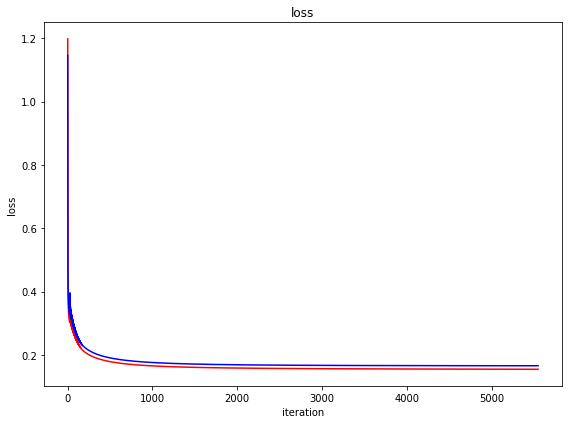

In [841]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

10


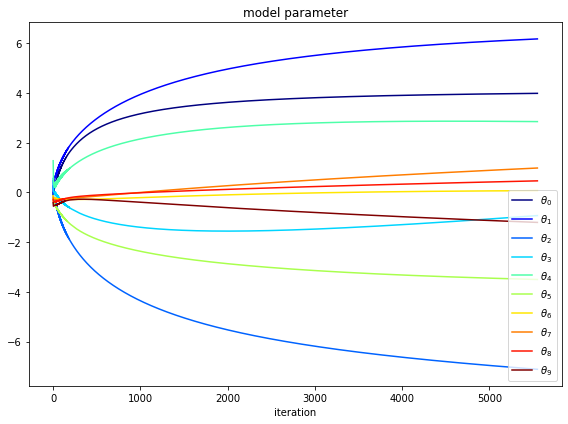

In [842]:
plot_model_parameter(theta_iteration)

In [839]:
def plot_classifier(data, theta,label):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
   
    t = 0.01
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))
    
    X = xx.ravel()
    Y = yy.ravel()
    
    feature = feature_function(X, Y)
    h = regression_function(theta, feature)
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,cmap = plt.get_cmap('RdBu_r'),levels = 90, vmin = -25, vmax = 25)
    plt.colorbar(cntr) 

    plt.scatter(data[:, 0][label == 1],data[:, 1][label == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label == 0],data[:, 1][label == 0], c="b", marker=".",label="class 0 ")
    
    plt.contour(xx,yy,Z,levels=[0],colors ="black")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

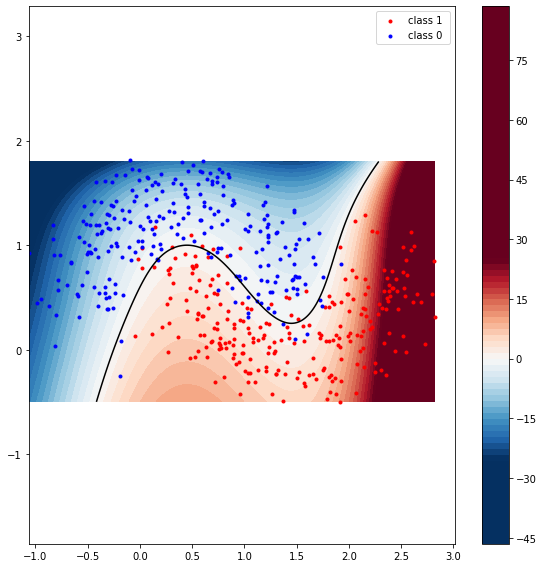

In [829]:
plot_classifier(data_train, theta_optimal ,label_train)

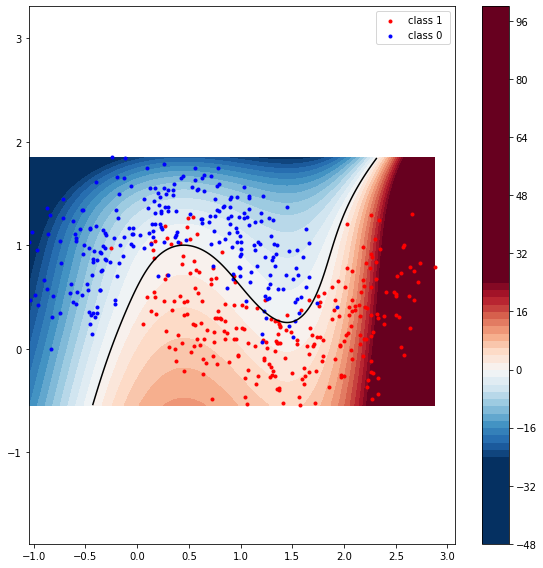

In [830]:
plot_classifier(data_test, theta_optimal,label_test)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

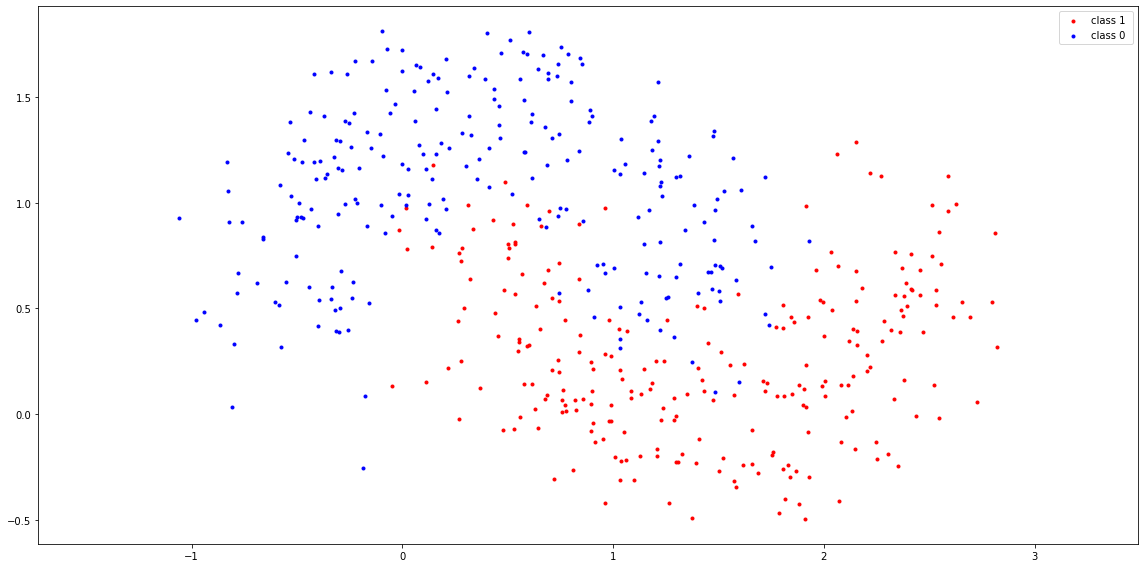

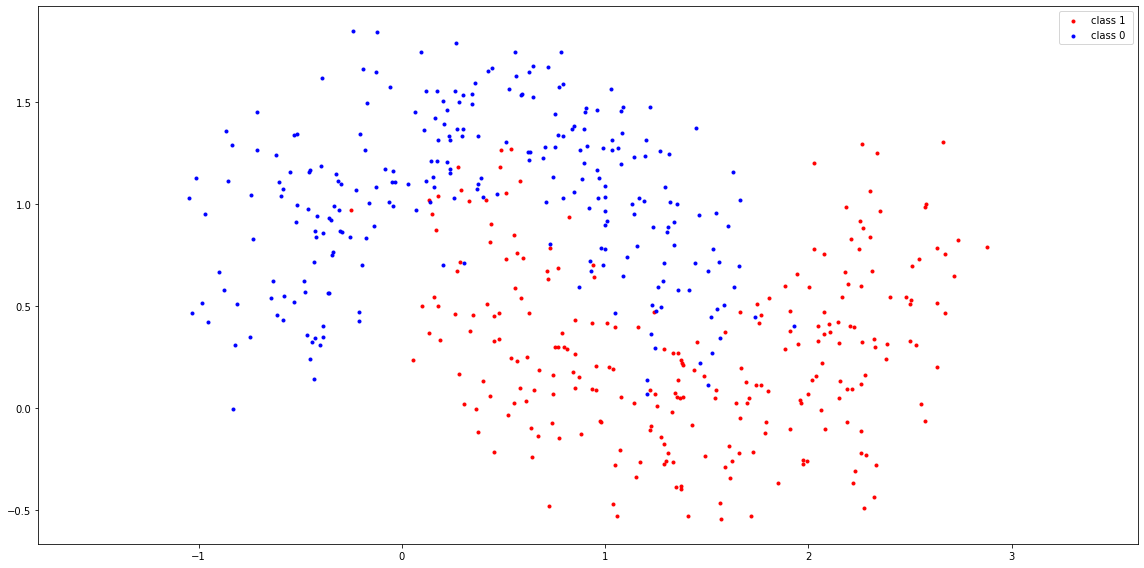

In [831]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

10


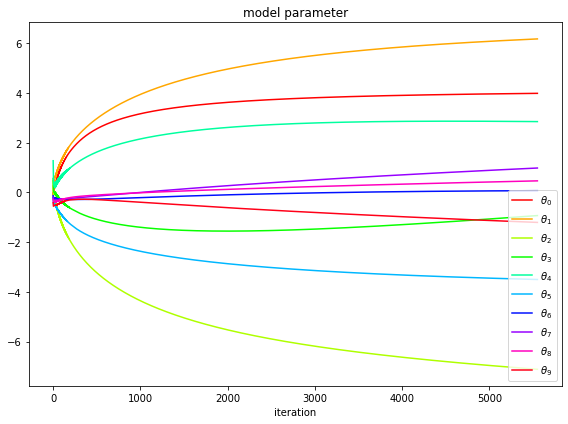

In [832]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

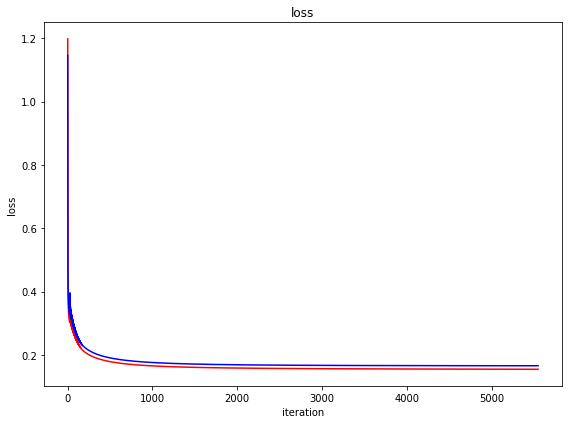

In [833]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

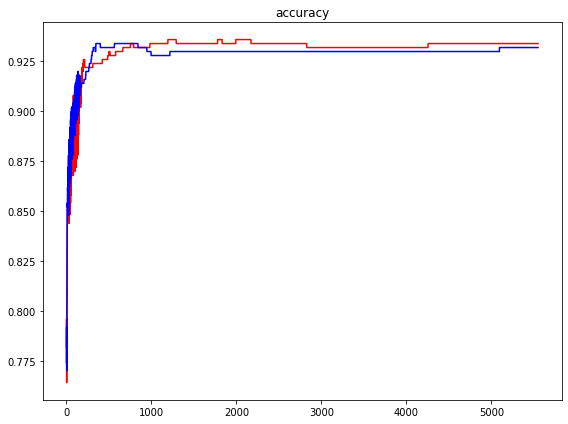

In [834]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

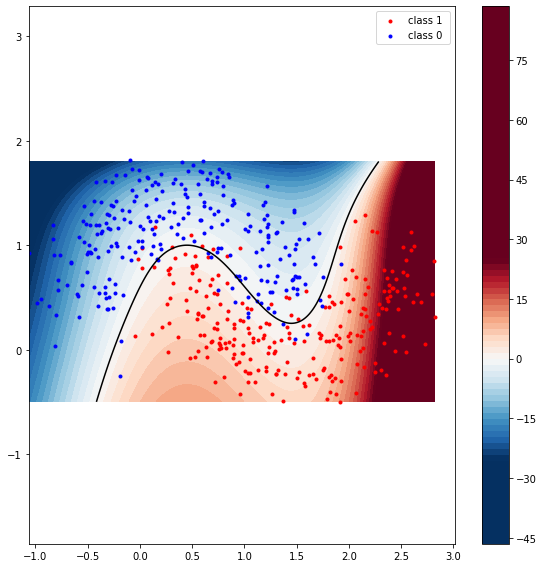

In [835]:
plot_classifier(data_train, theta_optimal,label_train)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

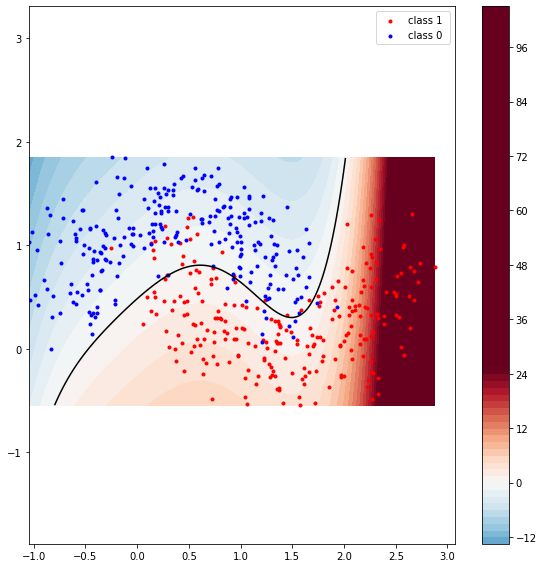

In [231]:
plot_classifier(data_test, theta_optimal,label_test)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [232]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): 0.904
accuracy(test) : 0.904
